In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

In [14]:
X,Y = make_blobs(n_samples = 500 , centers = 2 ,n_features=2 , random_state = 10)
print(X.shape , Y.shape)

(500, 2) (500,)


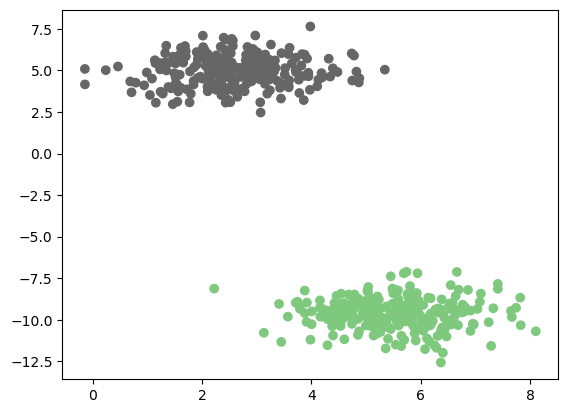

In [15]:
plt.scatter(X[: ,0],X[:,1],c=Y,cmap = plt.cm.Accent)
plt.show()

## Model and Helper function

In [16]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [17]:
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [18]:
def predict(X,weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost
def update(X,Y,weights,learning_rate):
    Y_ = predict(X,weights)
    dw    = np.dot(X.T,Y_-Y)
    m     = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights
def train(X,Y,learning_rate,maxEpochs=100):
    ones  = np.ones((X.shape[0],1))
    X  = np.hstack((ones,X))
    weights = np.zeros(X.shape[1])
    for epochs in range(maxEpochs):
        weights = update(X,Y,weights,learning_rate)
        if epochs % 10 == 0:
            l = loss(X,Y,weights)
            print("Epochs Number %d Loss %.4f"%(epochs,l))
    return weights

Epochs Number 0 Loss 0.1056
Epochs Number 10 Loss 0.0267
Epochs Number 20 Loss 0.0156
Epochs Number 30 Loss 0.0111
Epochs Number 40 Loss 0.0087
Epochs Number 50 Loss 0.0071
Epochs Number 60 Loss 0.0061
Epochs Number 70 Loss 0.0053
Epochs Number 80 Loss 0.0047
Epochs Number 90 Loss 0.0042


<Axes: >

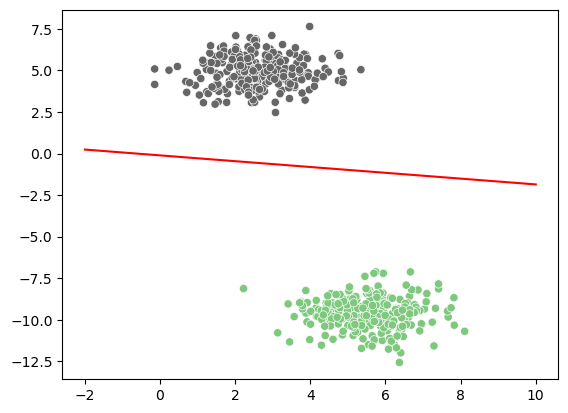

In [20]:
##Running the train function 
weight = train(X,Y,learning_rate=0.1,maxEpochs=100)
##Visualisation
x1 = np.linspace(-2,10,10)
x2 = -(weight[0] + weight[1]*x1)/weight[2]
plt.plot(x1,x2,color = 'red')
sns.scatterplot(x=X[:,0],y=X[:,1],c=Y,cmap = plt.cm.Accent)